# K-Means
- Dataset of $n$ $d{-}dimensional$ column-vectors as observations $[\mathbf{x}_1, \dots, \mathbf{x}_n] = \mathbf{X} \in \mathbb{R}^{d \times n}$
- Given $k \in \mathbb{N}$, assign each datapoint a label $j \in [1, k], j \in \mathbb{N}$ to best identify $k$ clusters among the data.
- Use 1-hot encoding for labeling, label for $\mathbf{x}_i$ is represented by $[0, 0, \dots, 1, \dots, 0]^T = \mathbf{y}_i \in \mathbb{R}^{k \times 1}$. $\mathbf{y}_{ij} = 1$ represents $\mathbf{x}_i$ belongs to cluster $j$. Since a datapoint can only belongs to 1 cluster, $\sum_{j=1}^k \mathbf{y}_{ij} = 1$. At the same time, the number of datapoints in cluster $j$ is $n_j = \sum_{i=1}^n \mathbf{y}_{ij}$. This form a 1-hot matrix $\mathbf{Y} \in \mathbb{R}^{k \times n}$.
- Use cluster centroid (or mean): a $d-dimensional$ vector $\underline{\mu}_j$ to represents cluster, and Euclidean metrics to determine distance between a datapoint to a cluster, also to work out which cluster datapoint should belong to. $k$ means form a matrix $\mathbf{M}\in \mathbb{R}^{d \times k}$
- The task is to minimize the overall distance of all datapoints to its assigned cluster (or label). For each datapoint: $$
  \text{min}\ |\mathbf{x}_i - \underline{\mu}_j|_2^2 \equiv \text{min}\ \sum_{j=1}^k\mathbf{y}_{ij}|\mathbf{x}_i - \underline{\mu}_j|_2^2
$$
- Or to summarise the problem $$
  \mathbf{Y}, \mathbf{M} = \underset{\mathbf{Y}, \mathbf{M}}{\text{argmin}}\ \sum_{i=1}^n\sum_{j=1}^k \mathbf{y}_{ij}|\mathbf{x}_i - \underline{\mu}_j|_2^2,\ \ s.t.\ \sum_{j=1}^k \mathbf{y}_{ij} = 1, j \in [1, k]
$$
- Which has no easy closed-form solution. However the following algorithm can be proved [1] to always decrease and reach an approximated minimum. At each step:
  - Treat means as constants and labels as variables, minimize the problem by reassigning the labels to given fixated clusters. Label $j$ for a datapoint $\mathbf{x}_i$ minimizes the problem when $\underline{\mu}_j$ is the closest point to $\mathbf{x}_i$ compared to other centroids. We iterate this datapoint's assigning over entire $n$ datapoints: $$
    j = \underset{j}{\text{argmin}}\ |\mathbf{x}_i - \underline{\mu}_j|_2^2, \ \ i\ \text{from}\ 1\ \text{to}\ n
  $$
  - Treat labels as constants and means as variables, minimize the problem by shifting the means to best fit its population. Iterating over $k$ clusters, with each cluster $j$, take partial derivative w.r.t. $\underline{\mu}_j$ and equate to $0$: $$\begin{aligned}
    \frac{\partial}{\partial{\underline{\mu}_j}}\ \sum_{i=1}^n \mathbf{y}_{ij}|\mathbf{x}_i - \underline{\mu}_j|_2^2 &= 0\\
    2\sum_{i=1}^n \mathbf{y}_{ij}|\mathbf{x}_i - \underline{\mu}_j|_2 &= 0\\
    \underline{\mu}_j &= \frac{\sum_{i=1}^n \mathbf{y}_{ij}\mathbf{x}_i}{\sum_{i=1}^n \mathbf{y}_{ij}}
  \end{aligned}$$
  - Repeat until computationally converged.

[[2.02620297 1.99431801]
 [2.97952922 5.983957  ]
 [8.08309577 2.86117443]]
4


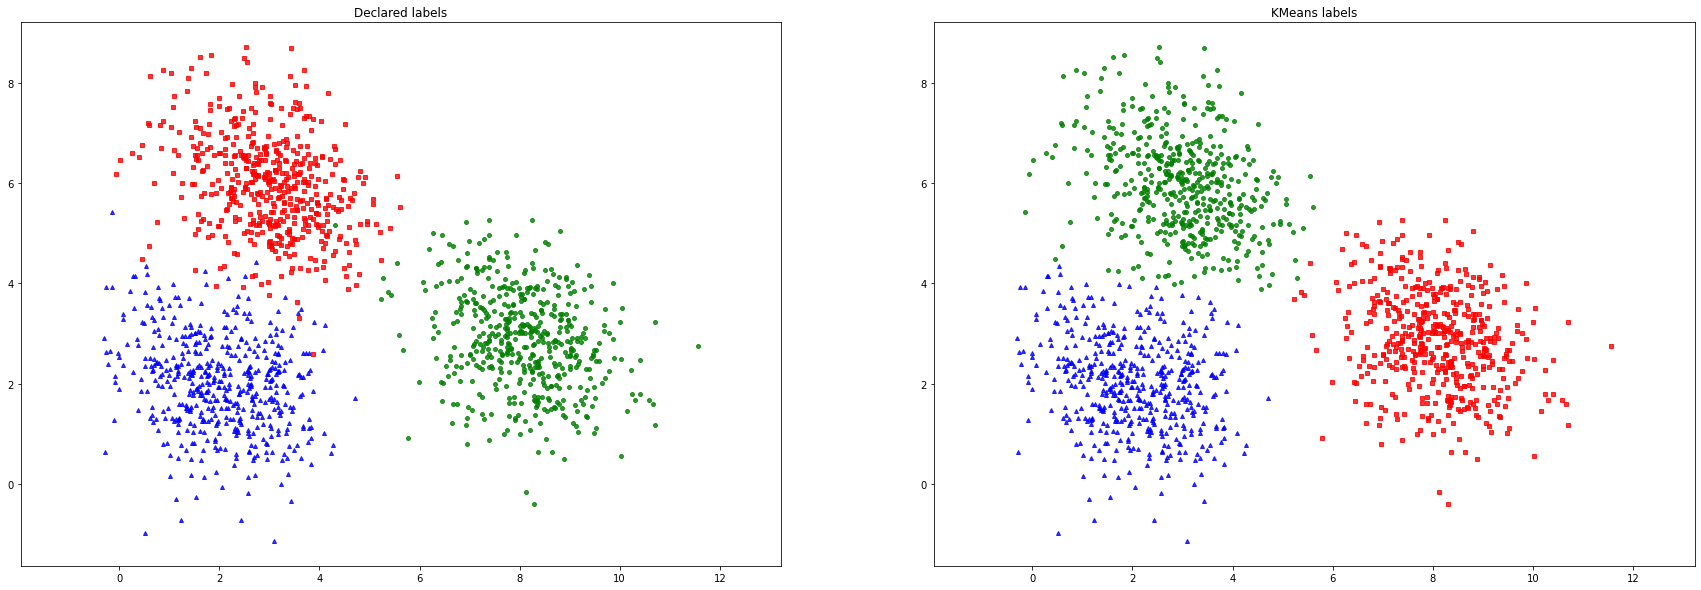

In [9]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from cluster.kmeans import KMeans

def display(X, label, ax):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    ax.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    ax.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    ax.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    ax.axis('equal')
    ax.plot()

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, -0.3], [-0.3, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
orig_labels = np.asarray([0]*N + [1]*N + [2]*N).T
K = 3

fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].title.set_text('Declared data from 3 Gaussians')
display(X, orig_labels, axs[0])

kmeans = KMeans(X, K)
(centers, labels, iterations) = kmeans.cluster()
print(centers[-1])
print(iterations)
axs[1].title.set_text('KMeans labels')
display(X, labels[-1], axs[1])

plt.show()

# References
- [1] https://las.inf.ethz.ch/courses/lis-s16/hw/hw4_sol.pdf